By: Gabriel Peery

We'll read in from files after running some simulations.

In [2]:
from json import load
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [240]:
class SimResult:
    """Class to store results of a simulation, plot information about them. Best
    if used as return of read_results method.
    """
    
    def __init__(self,
        link_energy_predict : pd.DataFrame,
        link_time : pd.DataFrame,
        spin : pd.DataFrame,
        link : pd.DataFrame,
        meta : pd.DataFrame,
        config : dict,
        accept : pd.DataFrame
    ):
        """Stores information about a simulation, providing a convenient
        container for plotting.
        """
        self.link_energy_predict = link_energy_predict
        self.link_time = link_time
        self.spin = spin
        self.link = link
        self.meta = meta
        self.config = config
        self.accept = accept
        
    def plot_equilibration(self, temp_idx : int):
        """Uses PyPlot to display a plot of link overlap as predicted during
        equilibration and as observed in the simulation as a function of Monte
        Carlo sweep, for the data at some temperature index.
        """
        # Put stuff on the plot
        plt.xscale("log")
        sweep_numbers = -1 + (2**(np.arange(len(self.link_time.iloc[0])) + 9))
        link_from_energy = np.array(list(self.link_energy_predict.iloc[temp_idx]))
        link_observed = np.array(list(self.link_time.iloc[temp_idx]))
        plt.plot(sweep_numbers, link_from_energy, "o-r", label="Predicted")
        plt.plot(sweep_numbers, link_observed, "o-b", label="Observed")
        
        # Setup labels
        this_temp = self.meta["Temperature"][temp_idx]
        plt.title(
            f"Link Overlap vs. Monte Carlo Sweep Number at T={this_temp:.2}"
        )
        plt.xlabel("$N_{sweep}$")
        plt.ylabel("$q_l$")
        plt.legend()
        plt.show()
        
    def plot_spin_dist(self, temp_idx : int):
        """Uses PyPlot to show a histogram of the spin overlaps observed during
        the simulation, for the states at some temperature determined by the
        index.
        """
        # Put on the plot
        q_values = np.linspace(-1, 1, len(self.spin.iloc[temp_idx]))
        freqs = self.spin.iloc[temp_idx]
        plt.bar(q_values, freqs, 1/len(self.spin.iloc[temp_idx]))
        
        # Setup labels
        this_temp = self.meta["Temperature"][temp_idx]
        plt.title(f"Distribution of Spin Overlap at T={this_temp:.2}")
        plt.xlim(-1.1, 1.1)
        plt.xlabel("$q$")
        plt.ylabel("$P(q)$")
        plt.show()
        
    def plot_link_dist(self, temp_idx : int):
        """Uses PyPlot to show a histogram of the link overlaps observed during
        the simulation, for the states at some temperature determined by the
        index.
        """
        # Put on the plot
        ql_values = np.linspace(-1, 1, len(self.link.iloc[temp_idx]))
        freqs = self.link.iloc[temp_idx]
        plt.bar(ql_values, freqs, 1/len(self.link.iloc[temp_idx]))
        
        # Setup labels
        this_temp = self.meta["Temperature"][temp_idx]
        plt.title(f"Distribution of Link Overlap at T={this_temp:.2}")
        plt.xlim(-1.1, 1.1)
        plt.xlabel("$q_l$")
        plt.ylabel("$P(q_l)$")
        plt.show()
        
    def plot_acceptance(self):
        """Uses PyPlot to display a plot of acceptance ratios versus temperature
        """
        # Put stuff on the plot
        temp = np.array(list(self.meta["Temperature"]))
        ratios = np.array(list(self.accept[0]))
        plt.plot(temp[:-1], ratios, "o-g")
        
        # Setup labels
        plt.title(
            "Acceptance Ratio vs. Temperature"
        )
        plt.xlabel("$T$")
        plt.ylabel("Acceptance Ratio")
        plt.show()
    
    
# NOTE: This only works for Windows, systems with '\' as directory separator
def read_results(name : str) -> SimResult:
    """Given a name of a simulation, reads in data from the directory.
    
    Returns corresponding DataFrame's and dictionary of its configuration in a
    special class.
    """
    link_energy_predict = pd.read_csv(
        name + r"\link_energy_predict.csv",
        header=None
    )
    link_time = pd.read_csv(
        name + r"\link_time.csv",
        header=None
    )
    spin = pd.read_csv(
        name + r"\spin.csv",
        header=None
    )
    link = pd.read_csv(
        name + r"\link.csv",
        header=None
    )
    meta = pd.read_csv(
        name + r"\meta.csv",
        index_col=0
    )
    with open(name + r"\config.json") as config_file:
        config = load(config_file)
    accept = pd.read_csv(
        name + r"\accept.csv",
        header=None
    )
    return SimResult(
        link_energy_predict,
        link_time,
        spin,
        link,
        meta,
        config,
        accept
    )

In [133]:
def full_suite_analysis(name : str):
    """Reads in a result, plots all the things"""
    sr = read_results(name)
    sr.plot_acceptance()
    for i in range(len(sr.meta.index)):
        sr.plot_equilibration(i)
    for i in range(len(sr.meta.index)):
        sr.plot_spin_dist(i)
    for i in range(len(sr.meta.index)):
        sr.plot_link_dist(i)
    return sr

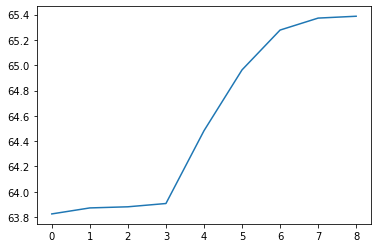

In [111]:
avg_energy = (sr.link_energy_predict.iloc[0] - 1) * 3 *27 / sr.meta["Temperature"][0]
plt.plot(avg_energy[:-1])

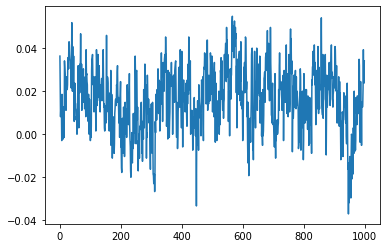

In [34]:
plt.plot(data[data["Beta"]==1.0].groupby("SweepID").mean()["SpinOverlap"] / (27))

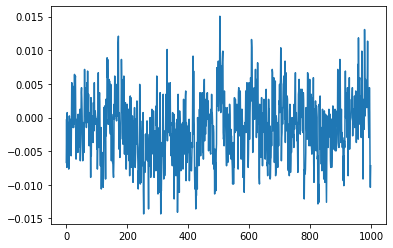

In [35]:
plt.plot(data[data["Beta"]==1.0].groupby("SweepID").mean()["LinkOverlap"] / (27*6))

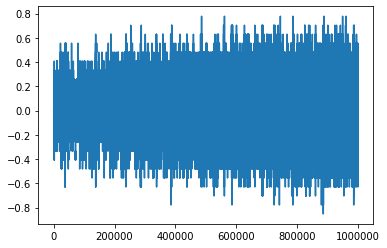

In [19]:
plt.plot(data["SpinOverlap"]/27)

In [14]:
df = pd.read_csv("vlarge.csv")

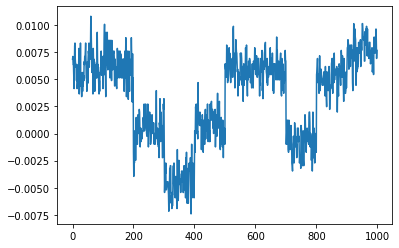

In [15]:
plt.plot(df)

In [36]:
y = list(data[data["Beta"]==2.0].groupby("SweepID").mean()["LinkOverlap"] / (27*6))

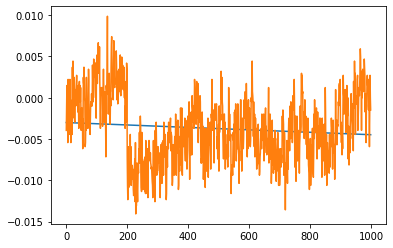

In [37]:
X = np.arange(len(y))
m, b = np.polyfit(X, y, 1)
fX = b + (m * X)
plt.plot(X, fX)
plt.plot(X, y)

In [38]:
m

-1.476530365419252e-06

In [41]:
avg_ql = data[data["Beta"]==2.0].groupby("SampleID").mean().mean()["LinkOverlap"]

In [42]:
U = 6 * (1 - avg_ql) / (0.5)

In [43]:
U

19.26768

In [44]:
avg_ql

-0.60564

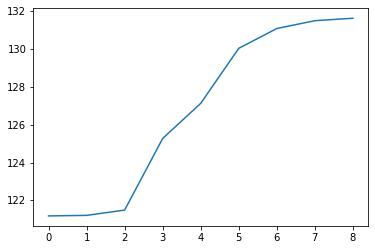

In [114]:
avg_energy = -(sr2.link_energy_predict.iloc[0] - 1) * 6 *27 / sr.meta["Temperature"][0]
plt.plot(avg_energy[:-1])

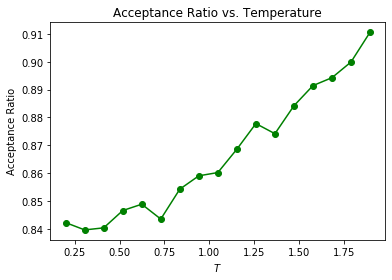

In [123]:
rsr = read_results("ratios")
rsr.plot_acceptance()

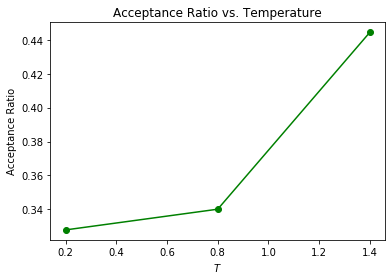

In [131]:
rsr = read_results("ratios2")
rsr.plot_acceptance()

In [ ]:
full_suite_analysis("ratios2")

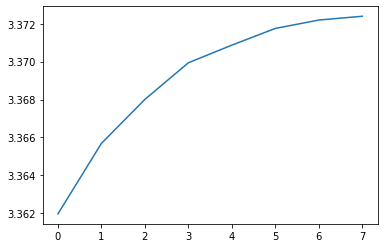

In [145]:
gr = read_results("good_ratio")
plt.plot(3 * (1 - gr.link_energy_predict.iloc[0]) / 0.2)

In [146]:
1-(3.368)*0.2/3

0.7754666666666666

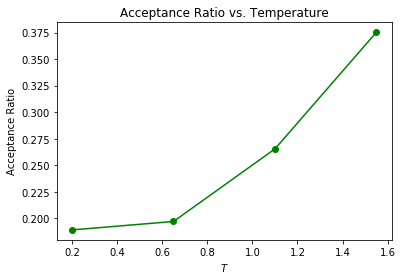

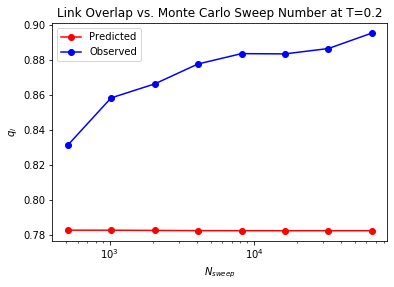

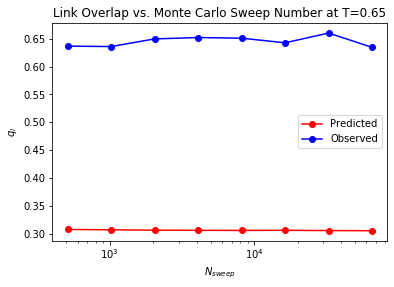

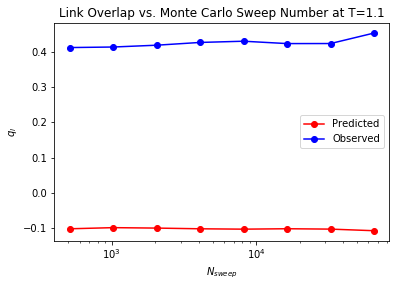

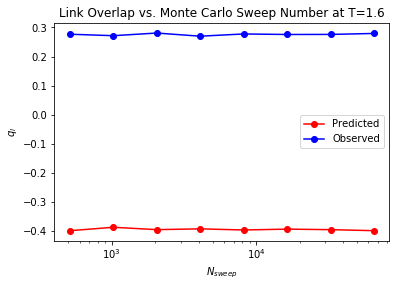

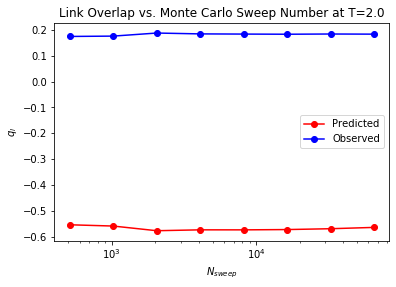

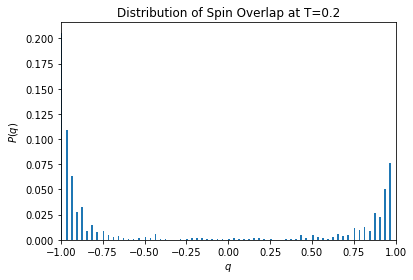

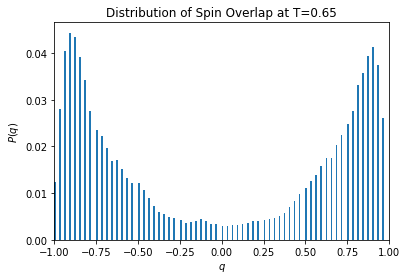

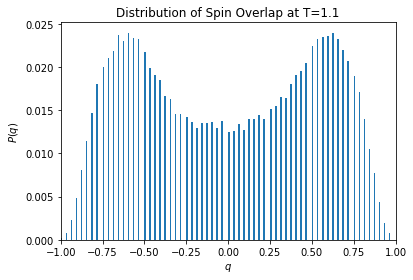

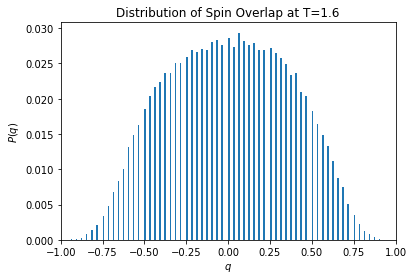

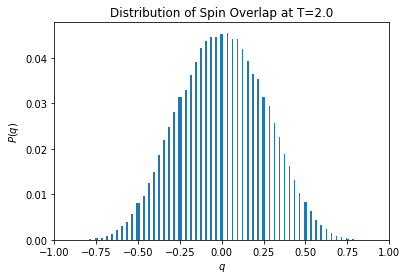

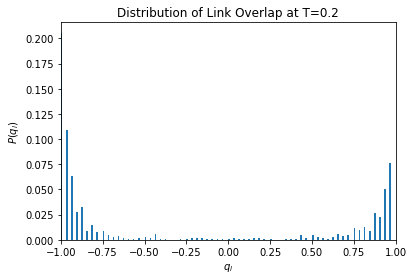

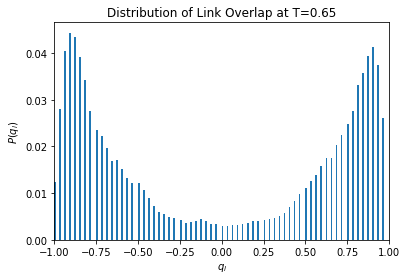

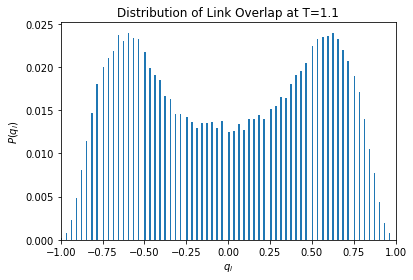

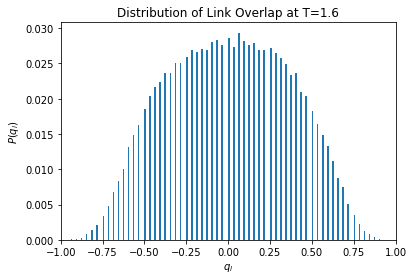

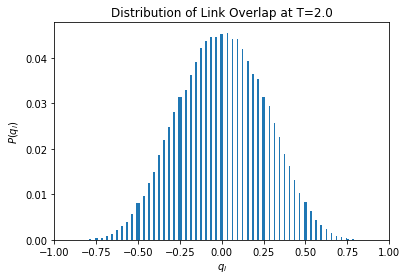

In [184]:
gr = full_suite_analysis("good_ratio")

In [189]:
gr.spin.iloc[4].sum()

1.125244140625

In [158]:
gr.config

{'size': 4,
 'samples': 25,
 'sweeps': 4096,
 'global_move_period': 1,
 'warmup_sweeps': 200,
 'temp_count': 5}

In [183]:
bin_end_q = np.linspace(-1.0, 1.0, 201)
spin_overlap = np.array([0.0, 0.0])
obs_tbl = np.zeros((2, 200))
def _update_obs_tbls(
        obs_tbls : np.ndarray,
        spin_overlap : np.ndarray,
        bin_end_q : np.ndarray
    ):
    """Updates the observation tables according to overlaps."""
    for bini in range(len(bin_end_q) - 1): # Bin index
        for bi in range(len(spin_overlap)): # Beta index
            if bin_end_q[bini] <= spin_overlap[bi] < bin_end_q[bini + 1]:
                obs_tbls[bi][bini] += 1
_update_obs_tbls(obs_tbl, spin_overlap, bin_end_q)
obs_tbl

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.,

In [190]:
import simulate

In [192]:
states = simulate.get_blank_states(4, 1)

In [221]:
simulate.init_rand_states(states)
spin_overlap = np.zeros(1)
link_overlap = np.zeros(1)
simulate.calc_overlaps(states, spin_overlap, link_overlap, np.array([[0], [0]]))
print(spin_overlap)
print(link_overlap)

[-6.]
[20.]


In [200]:
spin_overlap

array([0.])

In [201]:
link_overlap

array([-4.])

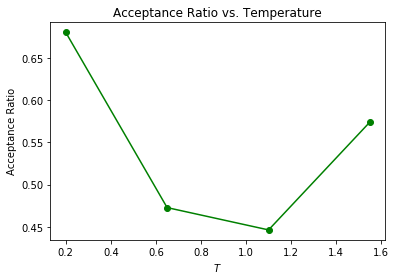

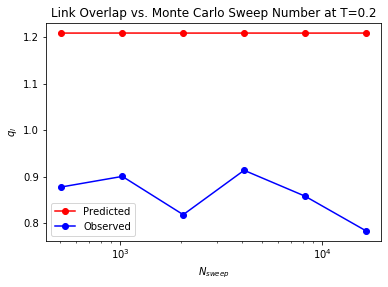

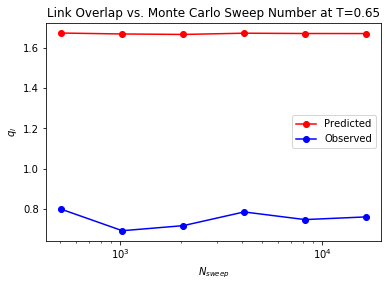

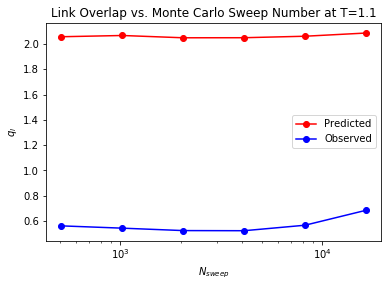

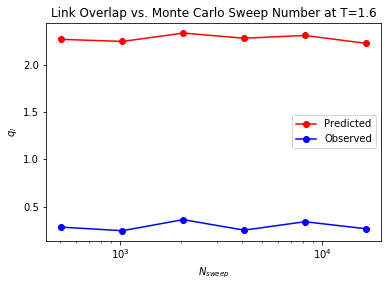

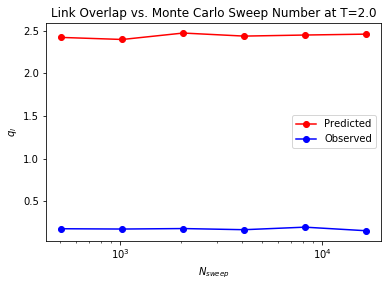

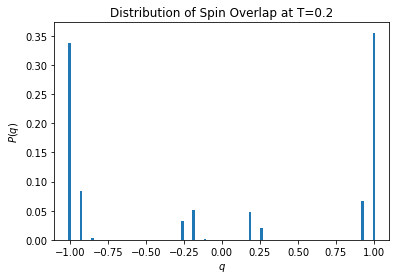

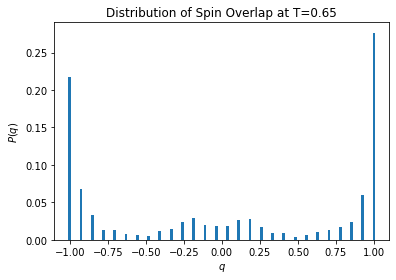

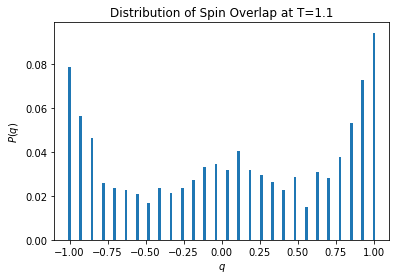

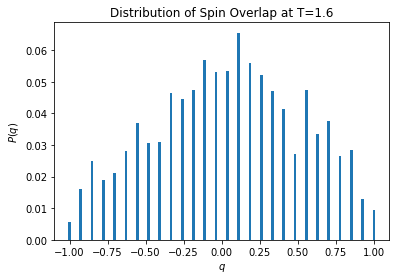

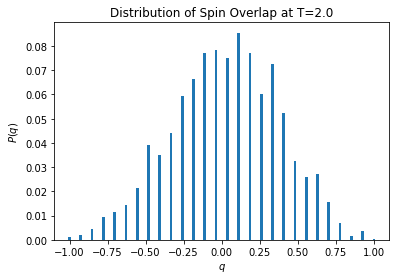

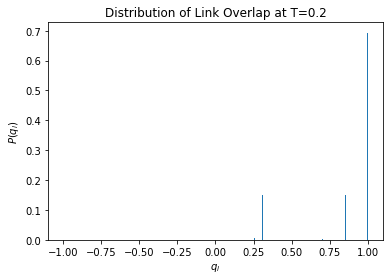

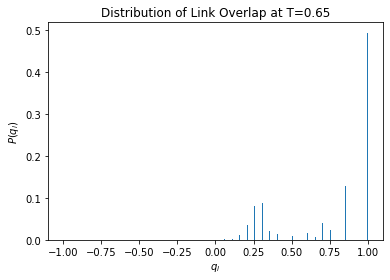

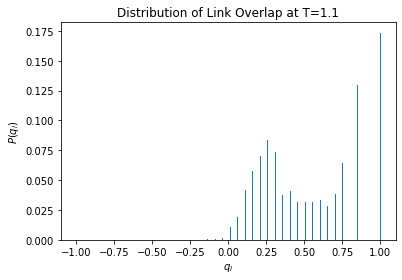

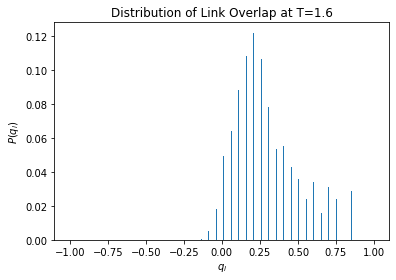

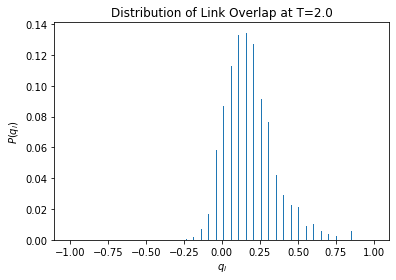

In [242]:
at = full_suite_analysis("abort_test")

In [239]:
at.spin

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.4025,0.0,0.0175,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,...,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.0280,0.0,0.552
1,0.2195,0.0,0.0775,0.0,0.0415,0.0,0.0150,0.0,0.0075,0.0,...,0.0,0.0130,0.0,0.0185,0.0,0.0405,0.0,0.0825,0.0,0.182
2,0.0395,0.0,0.0550,0.0,0.0595,0.0,0.0435,0.0,0.0320,0.0,...,0.0,0.0310,0.0,0.0430,0.0,0.0360,0.0,0.0365,0.0,0.032
3,0.0035,0.0,0.0110,0.0,0.0235,0.0,0.0275,0.0,0.0400,0.0,...,0.0,0.0275,0.0,0.0235,0.0,0.0200,0.0,0.0065,0.0,0.003
4,0.0005,0.0,0.0030,0.0,0.0055,0.0,0.0135,0.0,0.0130,0.0,...,0.0,0.0190,0.0,0.0050,0.0,0.0040,0.0,0.0010,0.0,0.001
